In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from time import perf_counter
from time import process_time
# Import functions created for this course
import timeit

In [2]:
# loading the dataset to a pandas DataFrame 
df = pd.read_csv(r'D:\dataprocessing\creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
target = 'Class'
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

In [4]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass


def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

# Correlation

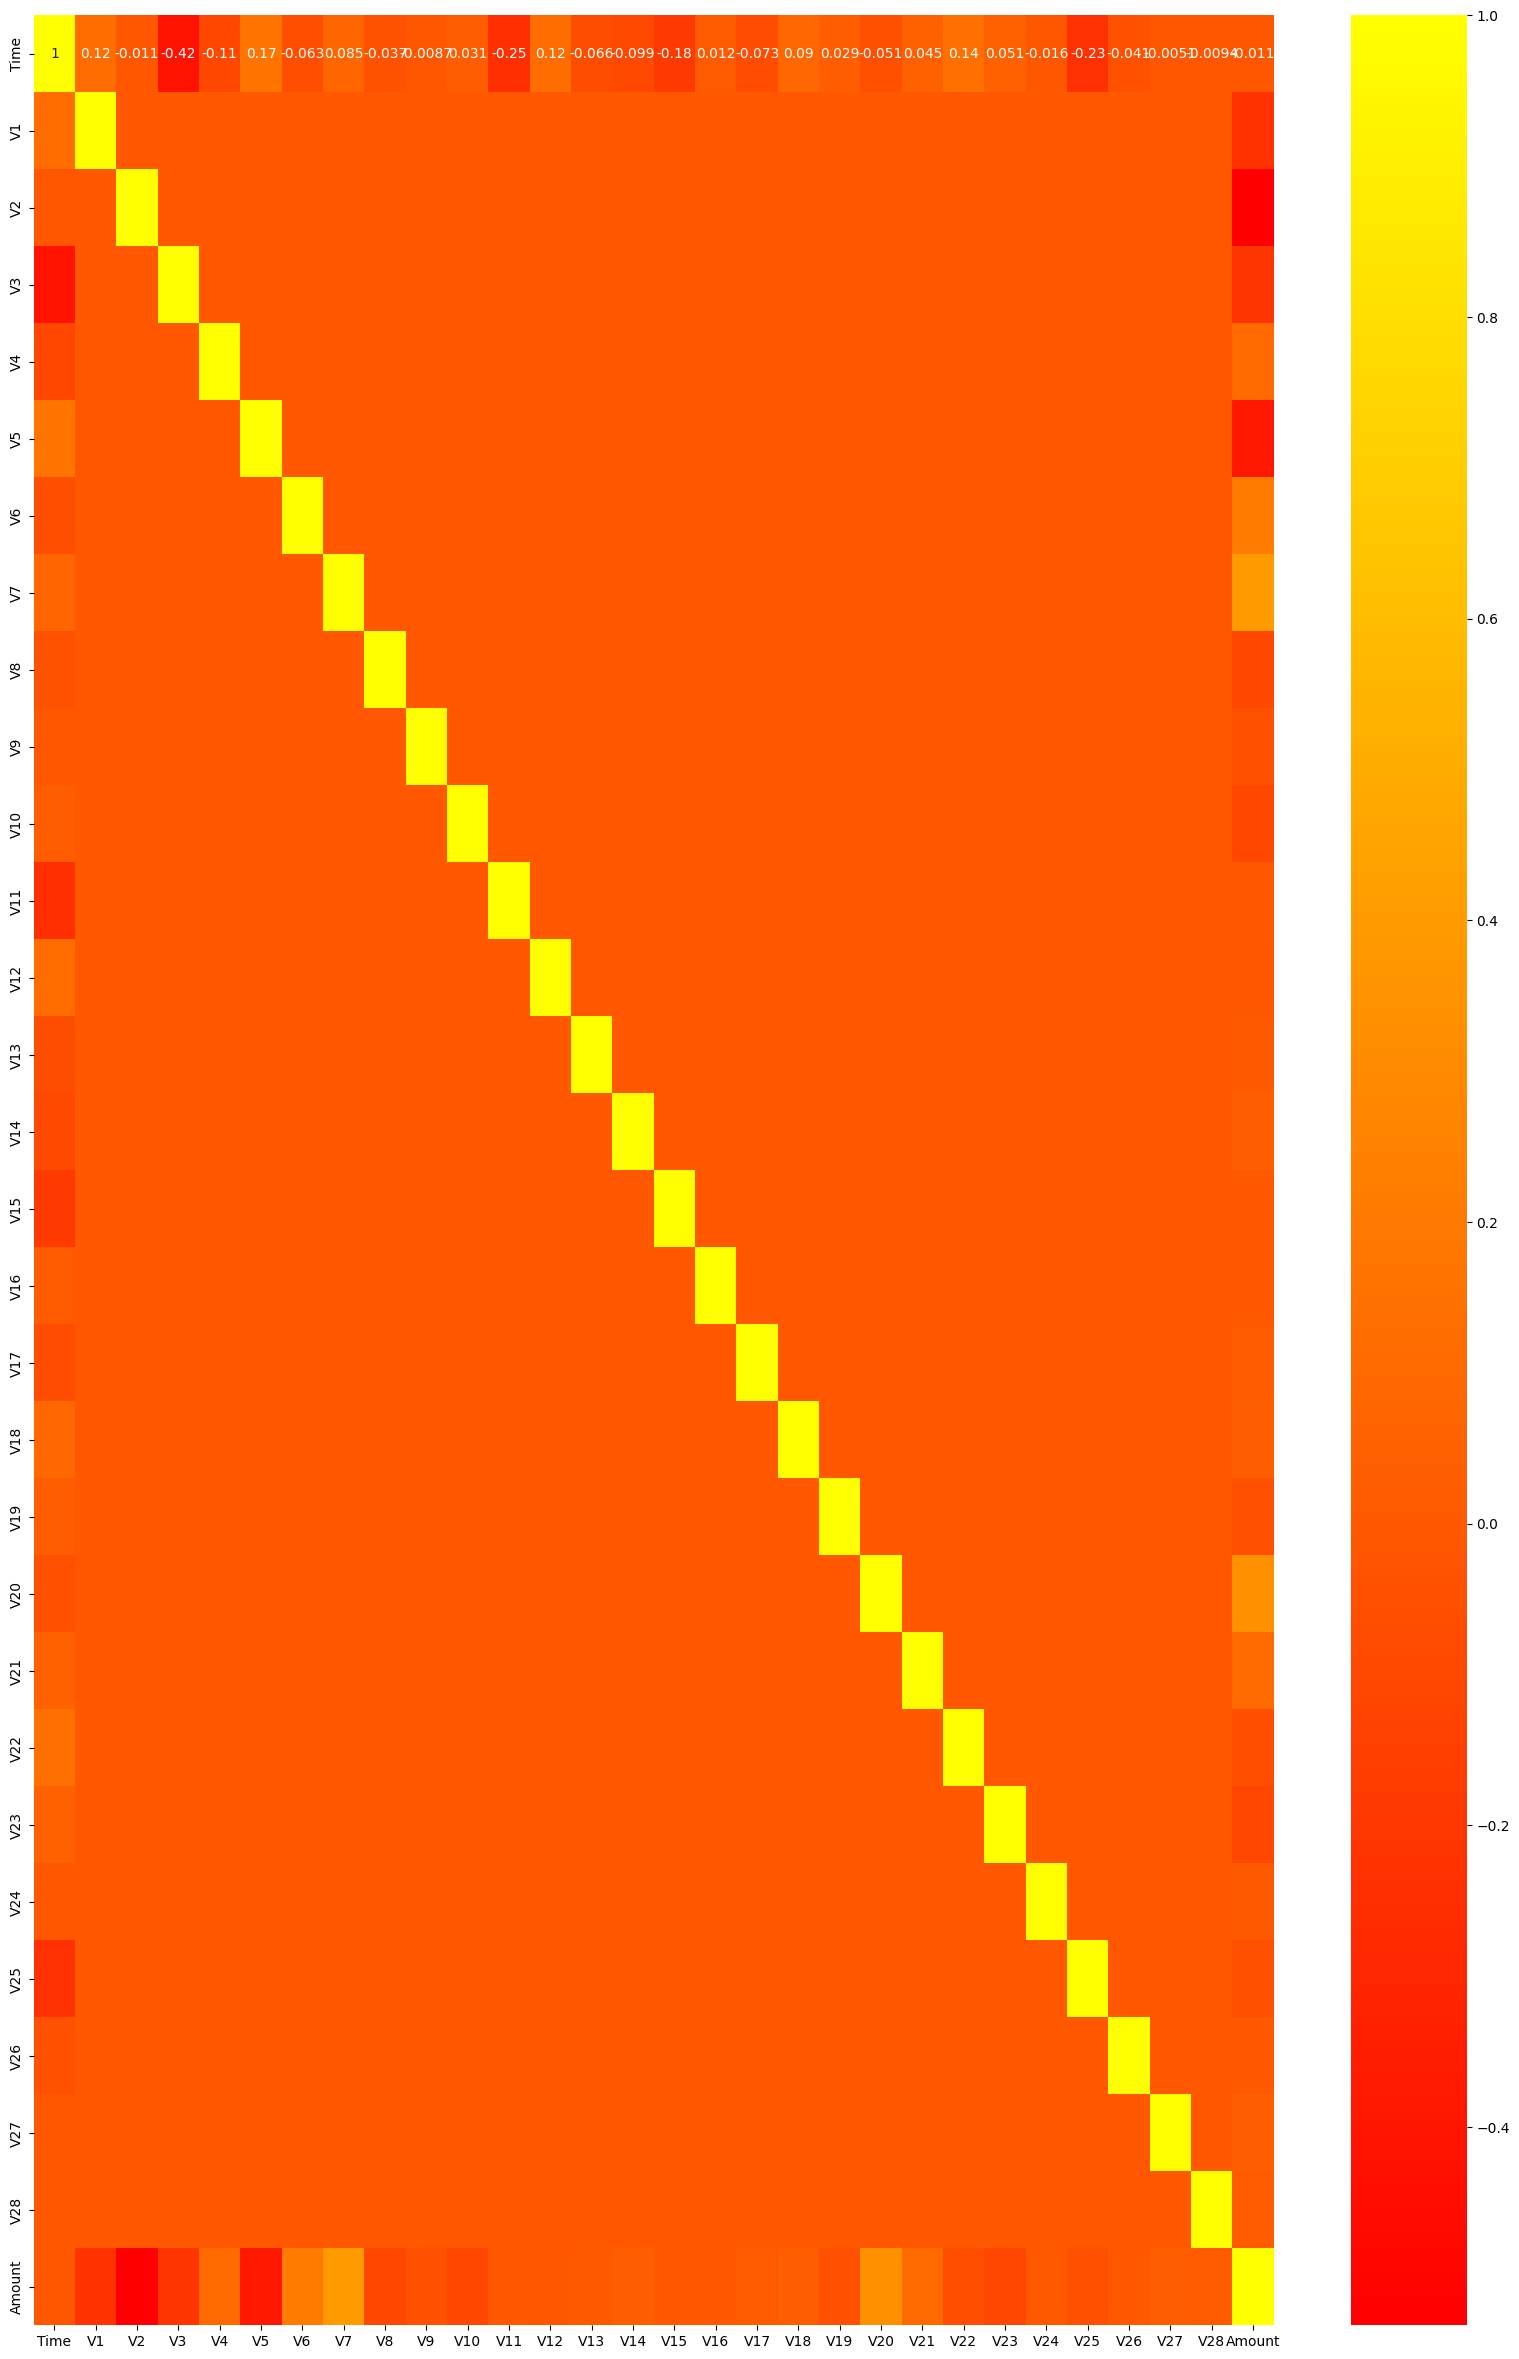

In [5]:
X.corr()

import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(20,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.autumn)
plt.show()
def correlation(dataset, threshold):#dataset is X_train , threshold is a value which is may be 80% ,90% ,70%.. 
    col_corr = set()  # Set of all the names of correlated columns
    # using set() so no duplicate column contain here ...
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X, 0.6)

In [6]:
len(set(corr_features))

0

In [7]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

In [10]:
from sklearn.decomposition import PCA

pca = PCA(None)
x_pca=pca.fit_transform(X)
x_pca

array([[ 0.41663045, -2.53266428, -0.67999702, ...,  0.52800765,
         0.27581306, -0.02083772],
       [-0.39345348, -2.0773255 , -0.52129112, ..., -0.84909671,
         0.76458219,  0.01490406],
       [ 1.86852545, -2.53349699, -0.08542482, ..., -1.21852981,
         0.21358778,  0.13526557],
       ...,
       [-0.19406338,  2.07078798,  0.10500039, ...,  0.01037805,
        -0.24503234, -0.00392092],
       [-0.46608925,  1.22539363, -0.05994015, ...,  1.00419645,
        -1.07832866,  0.0242546 ],
       [ 0.76759651,  1.90590292,  0.01471062, ..., -0.07321443,
        -0.45055744,  0.10879846]])

In [11]:
print(pca.explained_variance_ratio_)
total_var = pca.explained_variance_ratio_.sum() * 100
print(total_var)

[0.06527521 0.05612313 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333 0.03333333
 0.03333333 0.03333333 0.03333333 0.03333333 0.01052982 0.00140516]
100.0


# PC1 Vs PC2

In [13]:
'''principal_cifar_Df = pd.DataFrame(data = x_pca, columns = ['PC 1', 'PC 2'])
principal_cifar_Df['Class'] = Y'''

ValueError: Shape of passed values is (284807, 30), indices imply (284807, 2)

In [ ]:
#principal_cifar_Df.head()


In [14]:
'''import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Class",
    palette=sns.color_palette("tab10", 2),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)'''


NameError: name 'principal_cifar_Df' is not defined

<Figure size 1000x600 with 0 Axes>

In [15]:
total_var

100.0

In [16]:
pca.explained_variance_

array([1.95826326, 1.6836999 , 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 0.31589583, 0.04215505])

In [17]:
pca.components_

array([[-2.96469381e-002, -1.71551708e-001, -3.91550227e-001,
        -1.42527692e-001,  7.60644765e-002, -2.90266052e-001,
         1.61221068e-001,  2.90369129e-001, -7.48706686e-002,
        -3.23601835e-002, -7.57981588e-002,  7.73979574e-003,
        -1.08835632e-002,  5.94243378e-003,  2.79445747e-002,
         3.47389435e-003, -3.25126610e-003,  7.65762160e-003,
         2.34916899e-002, -4.23038385e-002,  2.51860652e-001,
         7.67829506e-002, -5.22430310e-002, -8.46411154e-002,
         4.29562695e-003, -2.80652214e-002, -1.08463906e-003,
         2.14156758e-002,  7.85595056e-003,  7.06648939e-001],
       [ 7.06467241e-001,  1.12951322e-001, -3.04452610e-002,
        -4.41333161e-001, -1.05143553e-001,  1.64660368e-001,
        -5.71904595e-002,  1.02114748e-001, -4.19624871e-002,
        -1.05724167e-002,  2.79120063e-002, -2.55935941e-001,
         1.28139875e-001, -6.79029306e-002, -1.00807885e-001,
        -1.89673502e-001,  1.21558889e-002, -7.54704876e-002,
       

In [18]:
explained_variance = pca.explained_variance_
explained_variance

array([1.95826326, 1.6836999 , 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 1.00000351, 1.00000351,
       1.00000351, 1.00000351, 1.00000351, 0.31589583, 0.04215505])

In [19]:
pca.n_components

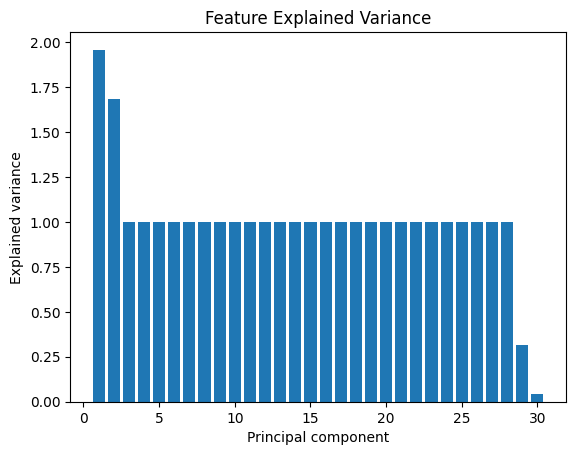

[1.95826326 1.6836999  1.00000351 1.00000351 1.00000351 1.00000351
 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351
 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351
 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351 1.00000351
 1.00000351 1.00000351 1.00000351 1.00000351 0.31589583 0.04215505]


In [20]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()
print(pca.explained_variance_)

cumulative_var_ratio [0.06527521 0.12139835 0.15473168 0.18806501 0.22139835 0.25473168
 0.28806501 0.32139835 0.35473168 0.38806501 0.42139835 0.45473168
 0.48806501 0.52139835 0.55473168 0.58806501 0.62139835 0.65473168
 0.68806501 0.72139835 0.75473168 0.78806501 0.82139835 0.85473168
 0.88806501 0.92139835 0.95473168 0.98806501 0.99859484 1.        ]


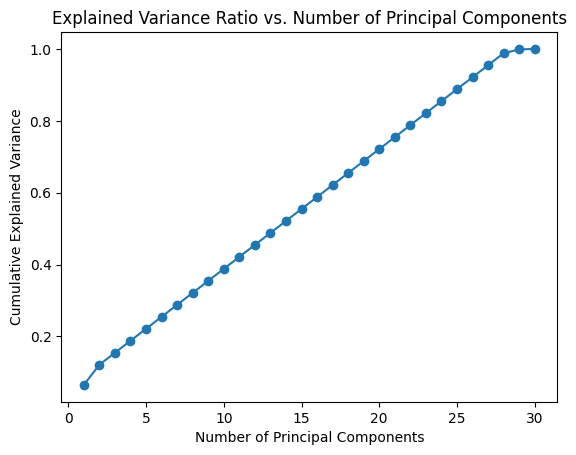

<Figure size 100x100 with 0 Axes>

In [21]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)
print('cumulative_var_ratio',cumulative_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.figure(figsize=(1,1))
plt.show()

In [22]:
pca.n_components_

30

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x_pca, Y, test_size=0.2, random_state=30)

In [24]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count
X_train=x_train_res
Y_train=y_train_res

In [25]:
X_train

array([[-0.45208557, -0.91050733, -0.72313965, ...,  0.47465288,
         0.01479813,  0.00974253],
       [-0.22496909,  1.60053674, -0.41071282, ...,  0.34939028,
        -0.16503656, -0.02359704],
       [-0.45497005,  1.3772829 , -0.27395371, ..., -0.78984265,
        -0.70802596, -0.0197811 ],
       ...,
       [-0.21474802, -0.01847791,  2.71144867, ...,  2.85678501,
        -0.1329818 , -0.09965828],
       [-0.50640713, -2.45754775,  9.29406158, ...,  6.31085109,
        -0.83633454, -0.15142938],
       [-0.95469629,  1.68534715,  5.66997045, ...,  3.79244427,
         0.01842089, -0.4004533 ]])

In [26]:
Y_train

,Class
0,0
1,0
2,0
3,0
4,0
...,...
454925,1
454926,1
454927,1
454928,1


# XGBoost

Elapsed time :  4.258695799973793
Accuracy on Training data : ,  1.0
Elapsed time :  0.6289275999879465
Accuracy score on Test data : 0.9995084442259752
Accuracy =  0.9995084442259752
Precision =  0.92
Recall =  0.8214285714285714
F1 Score =  0.8679245283018867
[[56842    20]
 [    8    92]]


<Axes: >

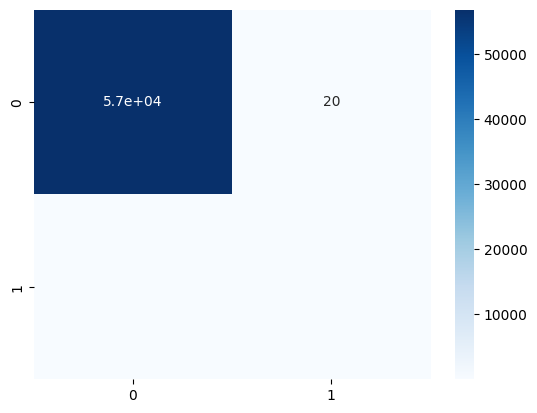

In [27]:
from xgboost import XGBClassifier
model = XGBClassifier(colsample_bytree= 1 , gamma = 0 , max_depth= 12, min_child_weight= 1, n_estimators=1750, reg_alpha= 0, reg_lambda= 0, seed= 0)
start_time =timeit.default_timer()
model.fit(X_train, Y_train)


#Accuracy on training data
start_time =timeit.default_timer()
x_train_prediction = model.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
start_time =timeit.default_timer()
x_test_prediction = model.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)

confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

# Random Forest 

C:\Users\almah\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Elapsed time :  3.533302199910395
Accuracy on Training data : ,  1.0
Elapsed time :  0.42590159992687404
Accuracy score on Test data : 0.9994908886626171
Accuracy =  0.9994908886626171
Precision =  0.9278350515463918
Recall =  0.8035714285714286
F1 Score =  0.8612440191387559
[[56843    22]
 [    7    90]]


<Axes: >

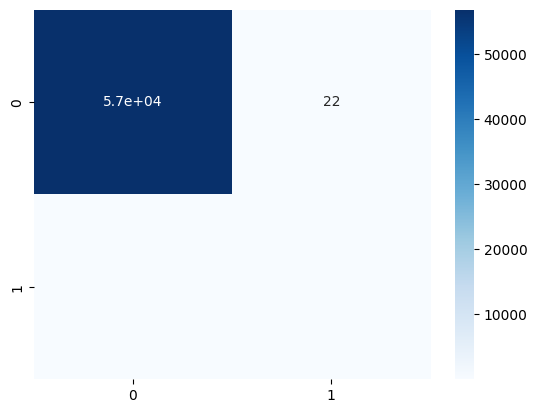

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4, random_state=2018,criterion='gini',n_estimators=100,verbose=False)

rf.fit(X_train, Y_train)


start_time = timeit.default_timer()

x_train_prediction = rf.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
start_time = timeit.default_timer()
x_test_prediction = rf.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)

cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

Elapsed time :  0.2748067999491468
Accuracy on Training data : ,  1.0
Elapsed time :  0.045512499986216426
Accuracy score on Test data : 0.9977177767634563
Accuracy =  0.9977177767634563
Precision =  0.45263157894736844
Recall =  0.7678571428571429
F1 Score =  0.5695364238410596
[[56746    26]
 [  104    86]]


<Axes: >

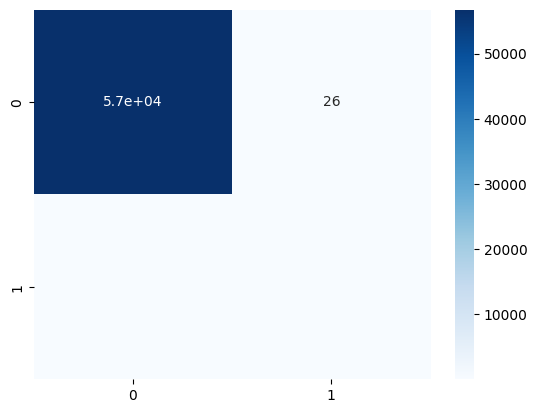

In [29]:
from sklearn import tree
classify_ = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 37, min_samples_leaf= 2, min_samples_split= 3,max_features=15,max_leaf_nodes=1200,splitter='best')


classify_ = classify_.fit(X_train,Y_train)



#Accuracy on training data
start_time = timeit.default_timer()
x_train_prediction = classify_.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
start_time = timeit.default_timer()
x_test_prediction = classify_.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)


cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

C:\Users\almah\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time :  8.672340600052848
Accuracy on Training data : ,  0.999936253929176
Elapsed time :  1.150645500048995
Accuracy score on Test data : 0.9993679997191109
Accuracy =  0.9993679997191109
Precision =  0.8518518518518519
Recall =  0.8214285714285714
F1 Score =  0.8363636363636364
[[56834    20]
 [   16    92]]


<Axes: >

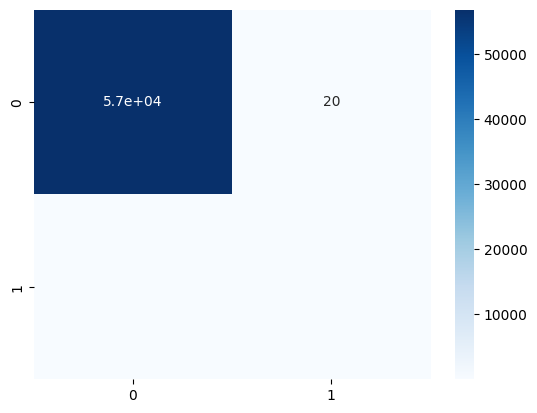

In [30]:
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
#MLPC = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes=(8, 45, 30), learning_rate= 'adaptive', max_iter= 4000, solver= 'adam')

MLPC.fit(X_train,Y_train)

#Accuracy on training data
start_time = timeit.default_timer()
x_train_prediction = MLPC.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)


training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 

start_time = timeit.default_timer()
x_test_prediction = MLPC.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

C:\Users\almah\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Elapsed time :  1037.9629621000495
Accuracy on Training data : ,  1.0
Elapsed time :  123.48153200000525
Accuracy score on Test data : 0.999385555282469
Accuracy =  0.999385555282469
Precision =  0.8468468468468469
Recall =  0.8392857142857143
F1 Score =  0.8430493273542602
[[56833    18]
 [   17    94]]


<Axes: >

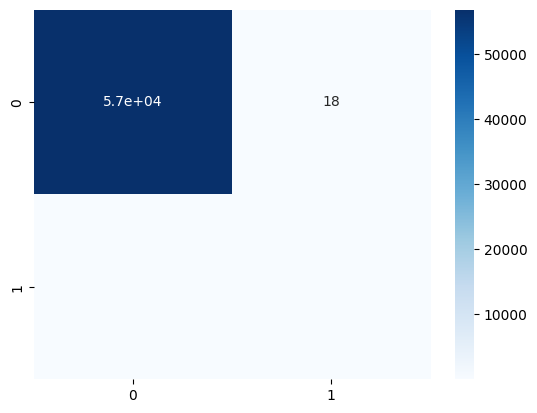

In [31]:
from sklearn.neighbors import KNeighborsClassifier 
#knn = KNeighborsClassifier(n_neighbors =3)
knn = KNeighborsClassifier(n_neighbors= 2,metric='minkowski',weights='uniform',algorithm='auto',leaf_size=2)

knn.fit(X_train,Y_train)

#Accuracy on training data
start_time =timeit.default_timer()
x_train_prediction = knn.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 

start_time =timeit.default_timer()
x_test_prediction  = knn.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
test_data_accuracy = accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

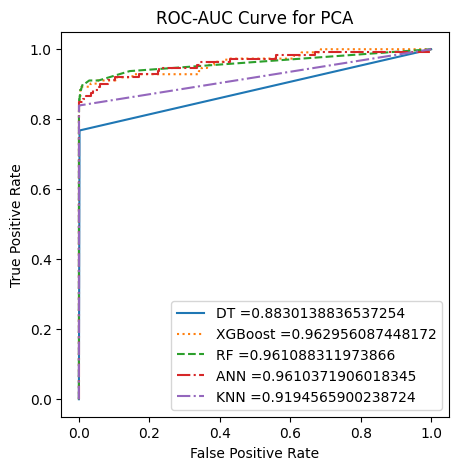

In [34]:
    y_pred_proba_dt = classify_.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    y_pred_proba_xb = model.predict_proba(X_test)[:, 1]
    fpr_xb, tpr_xb, thresholds = roc_curve(Y_test,  y_pred_proba_xb)
    auc_xb = roc_auc_score(Y_test, y_pred_proba_xb)
    
    y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, thresholds = roc_curve(Y_test,  y_pred_proba_rf)
    auc_rf = roc_auc_score(Y_test, y_pred_proba_rf)
    
    y_pred_proba_ann = MLPC.predict_proba(X_test)[:, 1]
    fpr_ann, tpr_ann, thresholds = roc_curve(Y_test,  y_pred_proba_ann)
    auc_ann = roc_auc_score(Y_test, y_pred_proba_ann)
    
    y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
    fpr_knn, tpr_knn, thresholds = roc_curve(Y_test,  y_pred_proba_knn)
    auc_knn = roc_auc_score(Y_test, y_pred_proba_knn)
    
    
    
    plt.figure(figsize=(5, 5), dpi=100)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="DT ="+str(auc_dt))
    plt.plot(fpr_xb,tpr_xb,linestyle='dotted',label="XGBoost ="+str(auc_xb))
    plt.plot(fpr_rf,tpr_rf,linestyle='dashed',label="RF ="+str(auc_rf))
    plt.plot(fpr_ann,tpr_ann,linestyle='-.',label="ANN ="+str(auc_ann))
    plt.plot(fpr_knn,tpr_knn,linestyle='dashdot',label="KNN ="+str(auc_knn))
    plt.title("ROC-AUC Curve for PCA")
    plt.legend(loc=4)
    plt.show()

# Precision Recall Curve

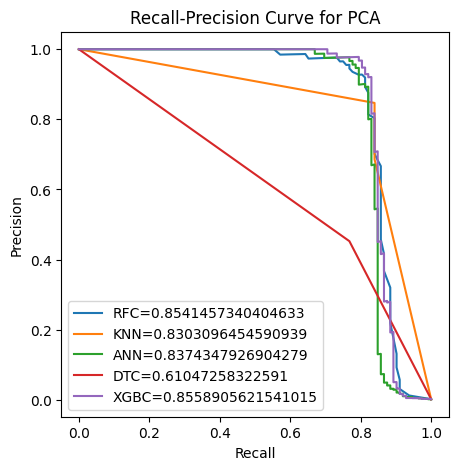

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)
y_test_prob_xb=model.predict_proba(X_test)[:,1]
precision_xb, recall_xb,_ =precision_recall_curve(Y_test, y_test_prob_xb)
auc_score_xb=metrics.auc(recall_xb, precision_xb)
y_test_prob_dt=classify_.predict_proba(X_test)[:,1]
precision_dt, recall_dt,_ =precision_recall_curve(Y_test, y_test_prob_dt)
auc_score_dt=metrics.auc(recall_dt, precision_dt)
y_test_prob_knn=knn.predict_proba(X_test)[:,1]
precision_knn, recall_knn,_ =precision_recall_curve(Y_test, y_test_prob_knn)
auc_score_knn=metrics.auc(recall_knn, precision_knn)
y_test_prob_ann=MLPC.predict_proba(X_test)[:,1]
precision_ann, recall_ann,_ =precision_recall_curve(Y_test, y_test_prob_ann)
auc_score_ann=metrics.auc(recall_ann, precision_ann)
plt.figure(figsize=(5,5))
plt.plot(recall_rf, precision_rf, marker='',label="RFC="+str(auc_score_rf))
plt.plot(recall_knn, precision_knn, marker='',label="KNN="+str(auc_score_knn))
plt.plot(recall_ann, precision_ann, marker='',label="ANN="+str(auc_score_ann))
plt.plot(recall_dt, precision_dt, marker='',label="DTC="+str(auc_score_dt))
plt.plot(recall_xb, precision_xb, marker='',label="XGBC="+str(auc_score_xb))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve for PCA")
plt.legend()
plt.show()

In [ ]:
'''from sklearn.svm import SVC
svc=SVC()

start_time = timeit.default_timer()
svc.fit(X_train,Y_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
#Accuracy on training data
x_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 
x_test_prediction = svc.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)'''


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.5, 
                                                    random_state=42)


ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())
Y_train[target].value_counts()

In [ ]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count
X=x_train_res
Y=y_train_res

# StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X=scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(.93)
x_pca=pca.fit_transform(X)
x_pca

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100

In [ ]:
total_var

In [ ]:
'''n_components = 30
pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Class'

fig = px.scatter_matrix(
    components,
    color=df.Class,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()'''

In [ ]:
'''import plotly.express as px
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    x_pca,
    labels=labels,
    dimensions=range(17),
    color=df["Class"]
)
fig.update_traces(diagonal_visible=False)
fig.show()'''

In [ ]:
'''plt.figure(figsize=(10, 6))
components = np.arange(1, 31, step=1)
eigenvalues = pca.explained_variance_
plt.plot(components, eigenvalues, marker = 'o', 
                 linestyle = '-')
plt.ylim(0, max(eigenvalues))
plt.ylabel('Explained variance')
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 31, step = 1))
plt.title('Scree plot')
#plt.axhline(y=1, color = 'b', linestyle = '-')
#plt.text(0, 0.75, 'Eigenvalue Cutoff', color = 'r', fontsize=14)
#plt.text(15, 1.10, 'Components Needed: '+str(np.where(eigenvalues<=1)[0][0]), color = 'red', fontsize=14)
plt.show()'''

# Eigen values

In [ ]:
pca.explained_variance_

# Eigen Vector

In [ ]:
pca.components_

In [ ]:
pca.explained_variance_ratio_

In [ ]:
explained_variance = pca.explained_variance_
explained_variance

In [ ]:
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [ ]:
explained_var_ratio = pca.explained_variance_ratio_
print('explained_var_ratio',explained_var_ratio)
cumulative_var_ratio = np.cumsum(explained_var_ratio)
print('cumulative_var_ratio',cumulative_var_ratio)
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

In [ ]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var1)

In [ ]:
plt.plot(var1)

In [ ]:
X.shape

In [ ]:
x_pca.shape

In [ ]:
pca.n_components_

In [ ]:
x_pca

# PC1 Vs PC2

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="Class",
    palette=sns.color_palette("tab10", 2),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_pca, Y, test_size=0.2, random_state=30)


# Logistic regression

In [ ]:

logModel = LogisticRegression()
start_time = perf_counter()
logModel.fit(X_train, Y_train)
end_time = perf_counter()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

#Accuracy on training data
x_train_prediction = logModel.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = logModel.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)


# Decision Tree

In [ ]:

from sklearn import tree
classify_ = tree.DecisionTreeClassifier()

start_time = timeit.default_timer()
classify_ = classify_.fit(X_train,Y_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
generate_model_report(Y_test, x_test_prediction)



#Accuracy on training data
x_train_prediction = classify_.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = classify_.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)



# ANN

In [ ]:

from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)

start_time = timeit.default_timer()
MLPC.fit(X_train,Y_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)


#Accuracy on training data
x_train_prediction = MLPC.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = MLPC.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)


# Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
start_time = timeit.default_timer()

rf.fit(X_train, Y_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
x_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
x_test_prediction = rf.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors =3)
start_time =timeit.default_timer()
model.fit(X_train,Y_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
#Accuracy on training data
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 
x_test_prediction  = model.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
Y_Test_Pred = model.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)


# NB

In [ ]:

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()

start_time = timeit.default_timer()
model.fit(X_train,Y_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

#Accuracy on training data
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 
x_test_prediction = model.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)



# SVM

In [ ]:

from sklearn.svm import SVC
svc=SVC()

start_time = timeit.default_timer()
svc.fit(X_train,Y_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
#Accuracy on training data
x_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 
x_test_prediction = svc.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)


# SVM(kernel=linear)

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

start_time = timeit.default_timer()
svc.fit(X_train,Y_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
#Accuracy on training data
x_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 
x_test_prediction = svc.predict(X_test)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)
